## Exploratory Data Analysis
by [Iqrar Agalosi Nureyza](https://www.kaggle.com/iqrar99)

Dataset : [Pokemon stats](https://www.kaggle.com/abcsds/pokemon)


Hello Everyone!
I'm a beginner and I try my best to do data analysis. This Pokemon Dataset is a very good dataset to begin with and I hope you can understand my analysis.

**Table of Contents**
1. [Basic Analysis](#1)
    * [Data Cleaning](#2)
    * [Frequency](#3)
    * [The Strongest and The Weakest](#4)
    * [The Fastest and The Slowest](#5)
    * [Summary](#6)
2. [Data Visualisation](#7)
    * [Count Plot](#8)
    * [Pie Plot](#9)
    * [Box Plot and Violin Plot](#10)
    * [Swarm Flot](#11)
    * [Heat Map](#12)

 <a id = "1"></a><br>
 ## Basic Analysis

In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [2]:
#Input Data
data = pd.read_csv("../input/pokemon/Pokemon.csv") #reading csv file and save it into a variable
data.head(10) #show the first 10 rows in data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


We finally know that our data has 12 columns.
* *Name*       : Nominal data
* *Type 1*     : Nominal data
* *Type 2*     : Nominal data
* *Total *     : Ratio data
* *HP *        : Ratio data
* *Attack*     : Ratio data
* *Defense*    : Ratio data
* *Sp Atk*     : Ratio data
* *Sp Def*     : Ratio data
* *Speed*      : Ratio data
* *Generation* : Ordinal data
* *Legendary*  : Nominal data

<a id = "2"></a>
### Data Cleaning
I found some unneeded text in *Name* column. For example, "CharizardMega Charizard X" should be "Mega Charizard X". So we need to remove all characters before "Mega".

In [3]:
data.Name = data.Name.str.replace(".*(?=Mega)", "")
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
data = data.set_index('Name') #change and set the index to the name attribute
data = data.drop(['#'],axis=1) #drop the columns with axis=1; axis=0 is for rows
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


If we look at row 5, there is a NaN type in the *Type 2* row. We can choose to delete or fill in the data. But in this case if we delete rows that has NaN, then it will mess up our data. Then we'll choose to fill it by copying the data from *Type 1* column.

In [5]:
data['Type 2'].fillna(data['Type 1'], inplace=True)
data.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


<a id = "3"></a>
### Frequency
Now, let's see all unique types in *Type 1* and *Type 2*.

In [6]:
print("Type 1:",data["Type 1"].unique(), "=", len(data["Type 1"].unique()))
print("Type 2:",data["Type 2"].unique(), "=", len(data["Type 2"].unique()))

Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] = 18
Type 2: ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost'] = 18


And we get that there are 18 unique types.
Ok, now we use *value_counts()* to count each unique type in *Type 1 * and * Type 2*

In [7]:
print(data["Type 1"].value_counts())
print(data["Type 2"].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64


We can conclude that the highest frequency in *Type 1* is **Water** and in *Type 2* is **Flying**. On the other hand, the lowest frequency in *Type 1* is **Flying** and in *Type 2* is **Bug**

<a id = "4"></a>
### The Strongest and The Weakest
**Who is the strongest and the weakest Pokemons by types?** We will find out.

In [8]:
strongest = data.sort_values(by='Total', ascending=False) #sorting the rows in descending order
strongest.drop_duplicates(subset=['Type 1'],keep='first')
#since the rows are now sorted in descending order
#thus we take the first row for every new type of pokemon i.e the table will check Type 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


So, we finally know who is the strongest pokemons by types. And also the strongest of the strongest pokemon is **Mega Rayquaza**, the Dragon type. And also we know that 10/18 Strongest Pokemons by types are Legendary. Let's check who is the weakest by types.

In [9]:
weakest = data.sort_values(by='Total') #sorting the rows in ascending order
weakest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Magikarp,Water,Water,200,20,10,55,15,20,80,1,False
Pichu,Electric,Electric,205,20,40,15,35,35,60,2,False
Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,False


We finally know who is the weakest pokemons by types. The weakest of the weakest pokemon is **Sunkern**, the Grass type. We can't find the Legendary category here.

<a id = "5"></a>
### The Fastest and The Slowest
**Now, who is the fastest and the slowest Pokemons by types?**

In [10]:
fastest = data.sort_values(by='Speed', ascending=False) #sorting the rows in descending order
fastest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
Electrode,Electric,Electric,480,60,50,70,80,80,140,1,False
Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


The Fastest pokemon is **DeoxysSpeed Forme** which is a Legendary Psychic pokemon.

In [11]:
slowest = data.sort_values(by='Speed') #sorting the rows in ascending order
slowest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,False
Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,False
Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,False
Torkoal,Fire,Fire,470,70,85,140,85,70,20,3,False


This data shows that Bug type and Normal type have slowest pokemon compared other types.

<a id = "6"></a>
### Summary

In [12]:
#now, let's summary the data
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


_________________________________________________________

<a id = "7"></a>
## Data Visualisation
And now we move to the important part where we will get informations from visualizing our data. First, we make count plots to see value counts for each type

<a id = "8"></a>
### Count Plot

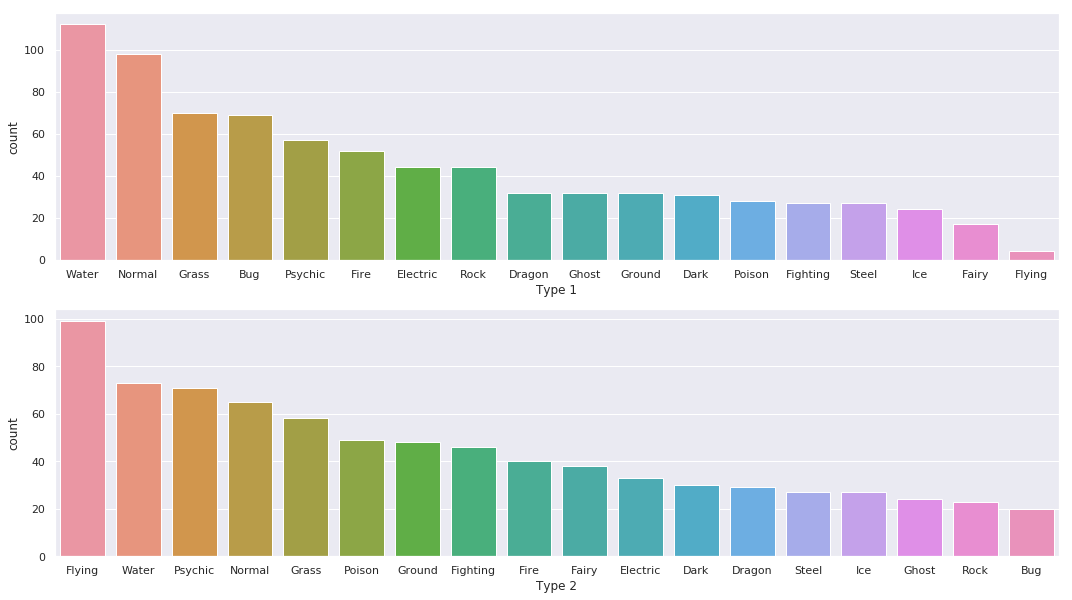

In [13]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(2,1, figsize = (18,10)) #making 2 count plots 

sns.countplot(x = 'Type 1', data = data, order = data['Type 1'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'Type 2', data = data, order = data['Type 2'].value_counts().index ,ax = ax[1])

plt.show()

<a id = "9"></a>
### Percentages for each type
**How about percentages for each type?** We can make a pie plot to get informations about that. But before that we must to count all pokemon types from both columns and avoid double counting, because we copied the elements in the *Type 1* column to the *Type 2* column before. **Why we do this?** Because there are pokemon that don't have Type 2.

In [14]:
#we create a dictionary to make process easier
types_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0, 'Flying' : 0}

type1 = data["Type 1"]
type2 = data["Type 2"]

for i in range(len(type1)):
    
    #first, count the Type 1 column
    types_count[type1[i]] += 1
    
    #now we count the Type 2 column and avoid double counting
    if type1[i] != type2[i]:
        types_count[type2[i]] += 1

for t in types_count:
    print("{:10} = {}".format(t,types_count[t]))

Grass      = 95
Fire       = 64
Water      = 126
Bug        = 72
Normal     = 102
Poison     = 62
Electric   = 50
Ground     = 67
Fairy      = 40
Fighting   = 53
Psychic    = 90
Rock       = 58
Ghost      = 46
Ice        = 38
Dragon     = 50
Dark       = 51
Steel      = 49
Flying     = 101


We got overall count from both types, now it's time to get *Type 1* count and *Type 2* count.

In [15]:
type1_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}
type2_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}

for i in range(len(type1)):
    type1_count[type1[i]] += 1
    type2_count[type2[i]] += 1

print("TYPE 1")
for t in type1_count:
    print("{:10} = {}".format(t,type1_count[t]))
print("-------------------")
print("TYPE 2")
for t in type2_count:
    print("{:10} = {}".format(t,type2_count[t]))

TYPE 1
Grass      = 70
Fire       = 52
Water      = 112
Bug        = 69
Normal     = 98
Poison     = 28
Electric   = 44
Ground     = 32
Fairy      = 17
Fighting   = 27
Psychic    = 57
Rock       = 44
Ghost      = 32
Ice        = 24
Dragon     = 32
Dark       = 31
Steel      = 27
Flying     = 4
-------------------
TYPE 2
Grass      = 58
Fire       = 40
Water      = 73
Bug        = 20
Normal     = 65
Poison     = 49
Electric   = 33
Ground     = 48
Fairy      = 38
Fighting   = 46
Psychic    = 71
Rock       = 23
Ghost      = 24
Ice        = 27
Dragon     = 29
Dark       = 30
Steel      = 27
Flying     = 99


Yes! Now finally we can make the pie plot. We'll make 3 pie plots: Type 1 count, Type 2 count. and overall count,

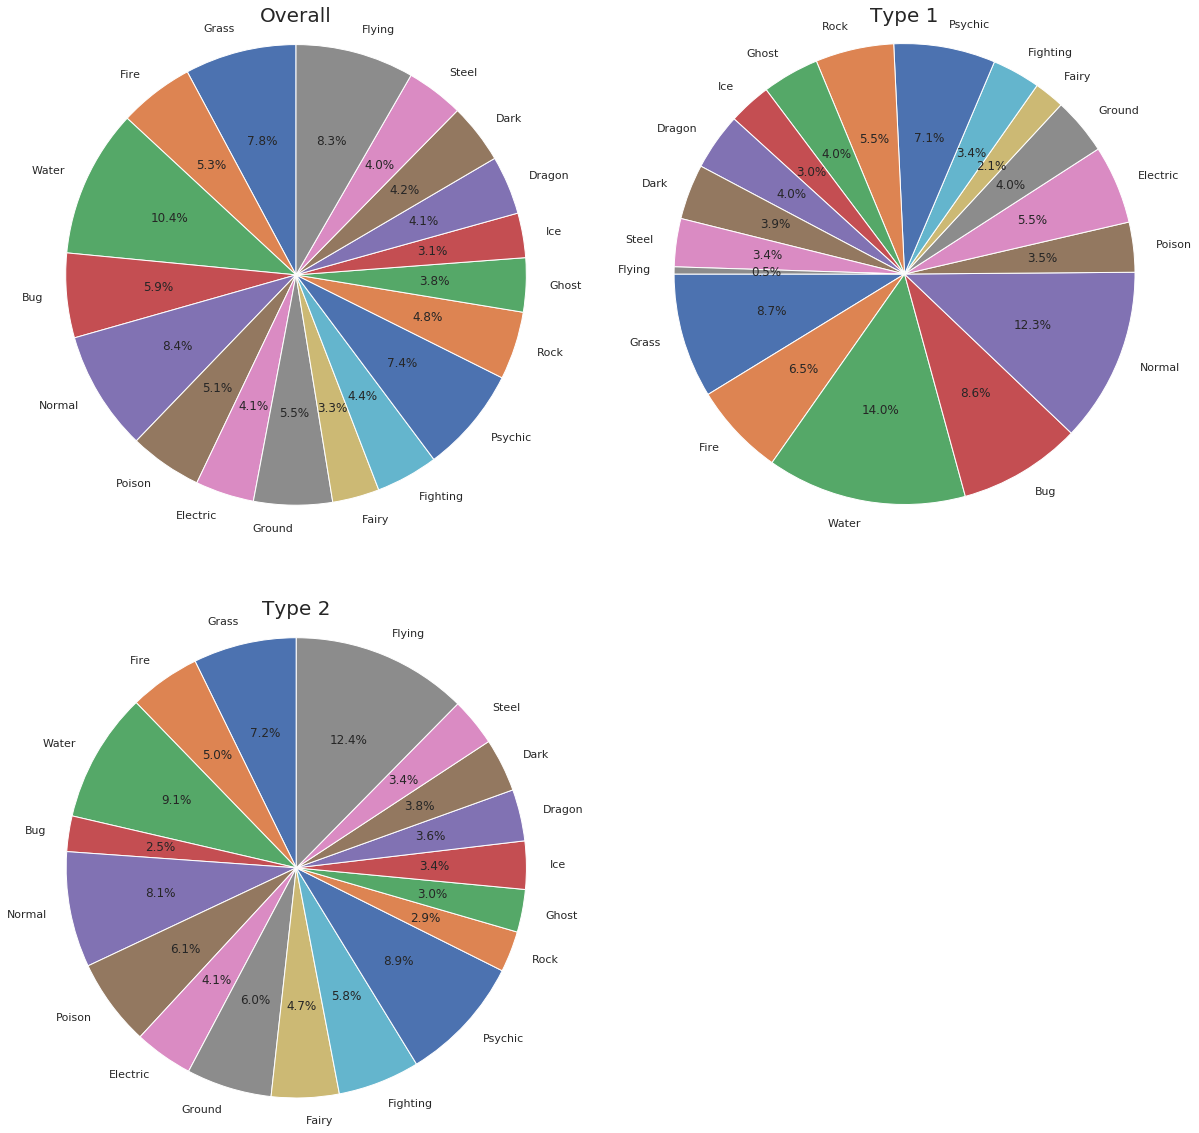

In [16]:
f, axs = plt.subplots(2,2, figsize=(20,20))

labels ='Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', \
        'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost' ,'Ice' ,'Dragon' ,'Dark' , \
        'Steel','Flying'
    
size0 = [95,64,126,72,102,62,50,67,40,53,90,58,46,38,50,51,49,101] #overall count
size1 = [70,52,112,69,98,28,44,32,17,27,57,44,32,24,32,31,27,4] #Type 1 count
size2 = [58,40,73,20,65,49,33,48,38,46,71,23,24,27,29,30,27,99] #Type 2 count

#Overall pie
axs[0,0].pie(size0, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[0,0].axis("equal")
axs[0,0].set_title("Overall", size = 20)

#Type1 pie
axs[0,1].pie(size1, labels = labels, autopct='%1.1f%%' ,startangle = 180)
axs[0,1].axis("equal")
axs[0,1].set_title("Type 1", size = 20)

#Type2 pie
axs[1,0].pie(size2, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[1,0].axis("equal")
axs[1,0].set_title("Type 2", size = 20)

f.delaxes(axs[1,1]) #deleting axs[1,1] so it will be white blank
plt.show()

<a id = "10"></a>
### All stats analysis of the pokemons
let's analyze all ratio data.

In [17]:
data2 = data.drop(['Generation', 'Total', 'Legendary'], axis = 1) #we drop some columns that unnecessary
data2.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45
Ivysaur,Grass,Poison,60,62,63,80,80,60
Venusaur,Grass,Poison,80,82,83,100,100,80
Mega Venusaur,Grass,Poison,80,100,123,122,120,80
Charmander,Fire,Fire,39,52,43,60,50,65


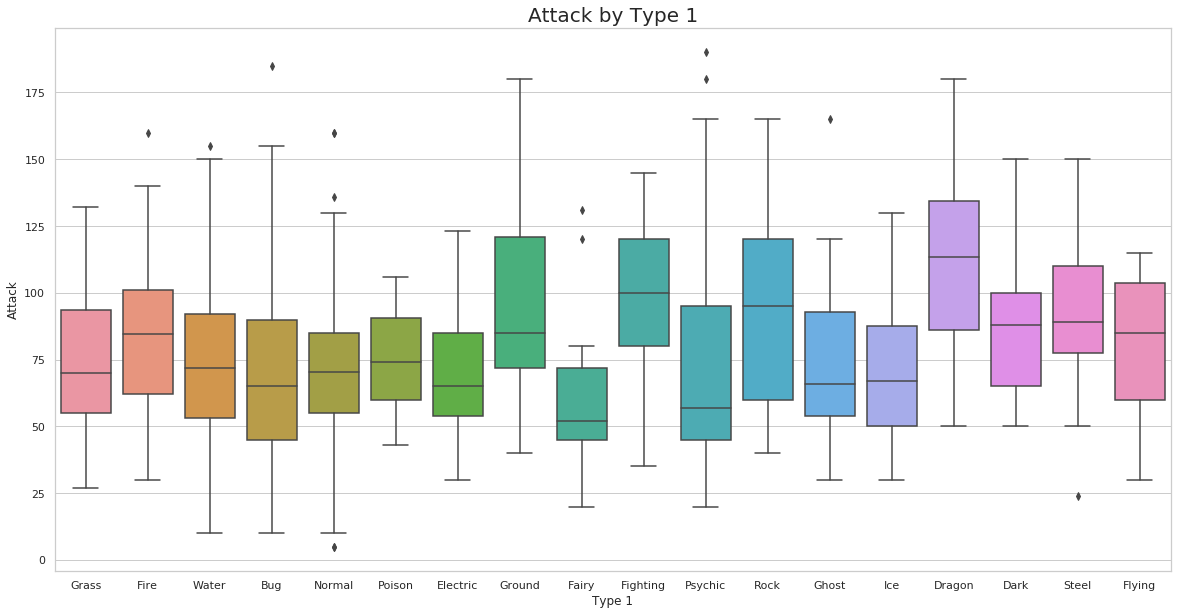

In [18]:
#stats for the Attack by Type 1
sns.set_style("whitegrid")
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.boxplot(data = data2, x = 'Type 1', y = 'Attack')
ax.set_title(label='Attack by Type 1', size = 20)

plt.show()

Take a look at the data. We can conclude that the **Dragon** type pokemon has an advantage over other types because they have a higher attack compared to other types. Let's see the starter pokemon : Fire, Water, and Grass. Fire Pokemons have a higher attack than Water and Grass. So it's very recommended to use it for attacking opponent for every beginner trainer. (If you ever played pokemon, then u can understand what *starter pokemon* is)

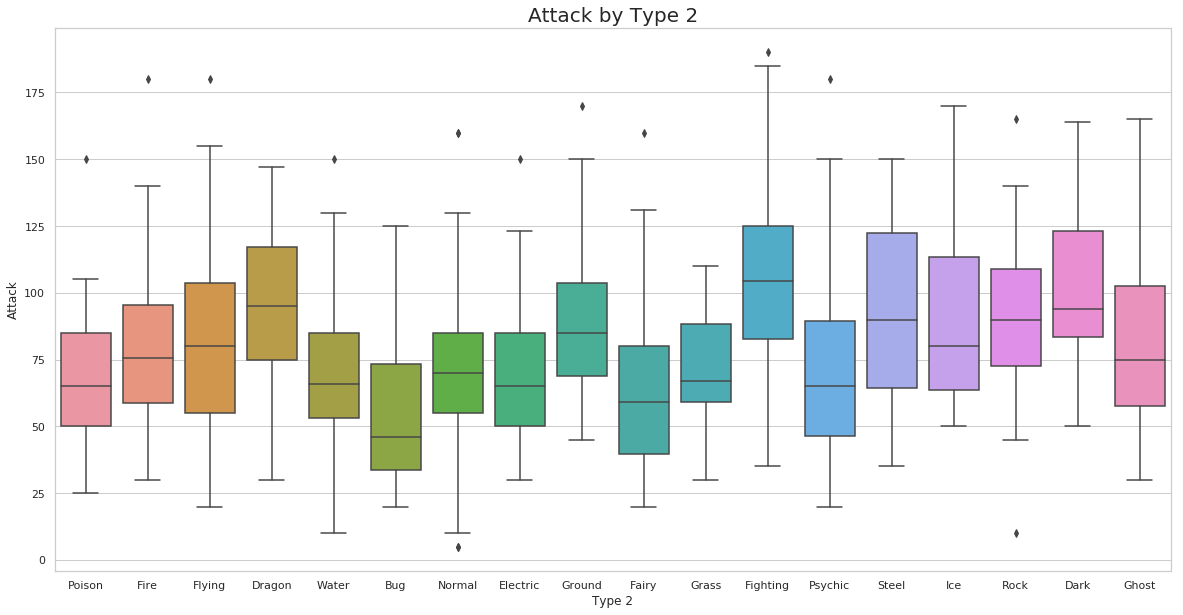

In [19]:
#stats for the Attack by Type 2
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.boxplot(data = data2, x = 'Type 2', y = 'Attack')
ax.set_title(label='Attack by Type 2', size = 20)

plt.show()

And from this chart, we can conclude that **Fighting** pokemon have a higher attack than other pokemon types. All pokemons that have Fighting as their second type have higher attack value.

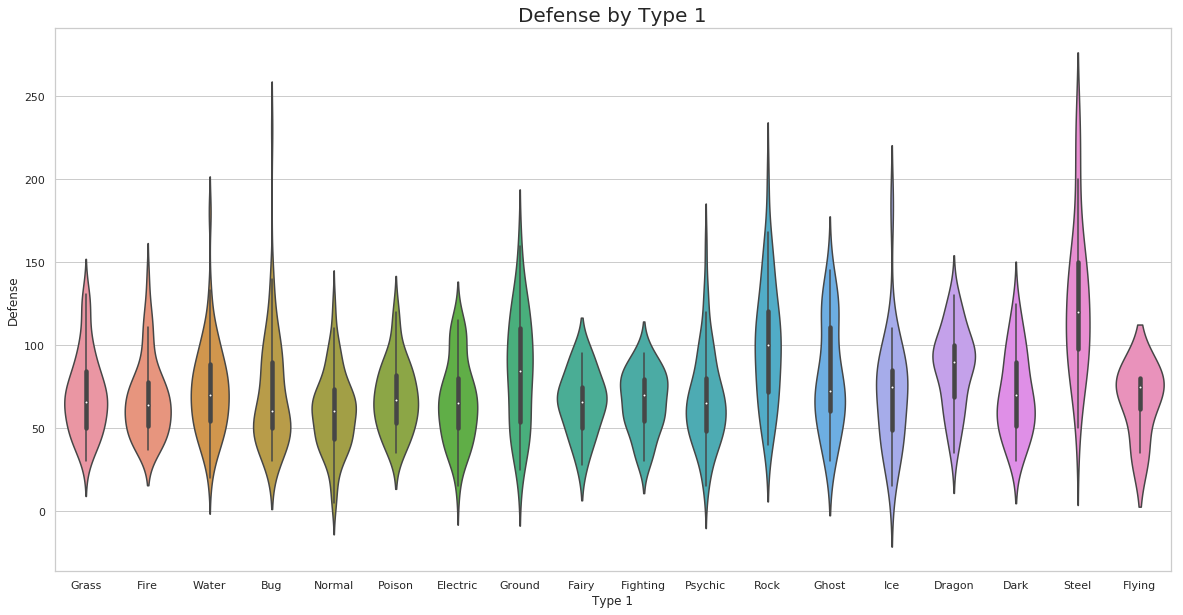

In [20]:
#stats for the Defense by Type 1
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.violinplot(data = data2, x = 'Type 1', y = 'Defense')
ax.set_title(label='Defense by Type 1', size = 20)

plt.show()

This shows that **Steel ** pokemon have the highest defense compared the other types.

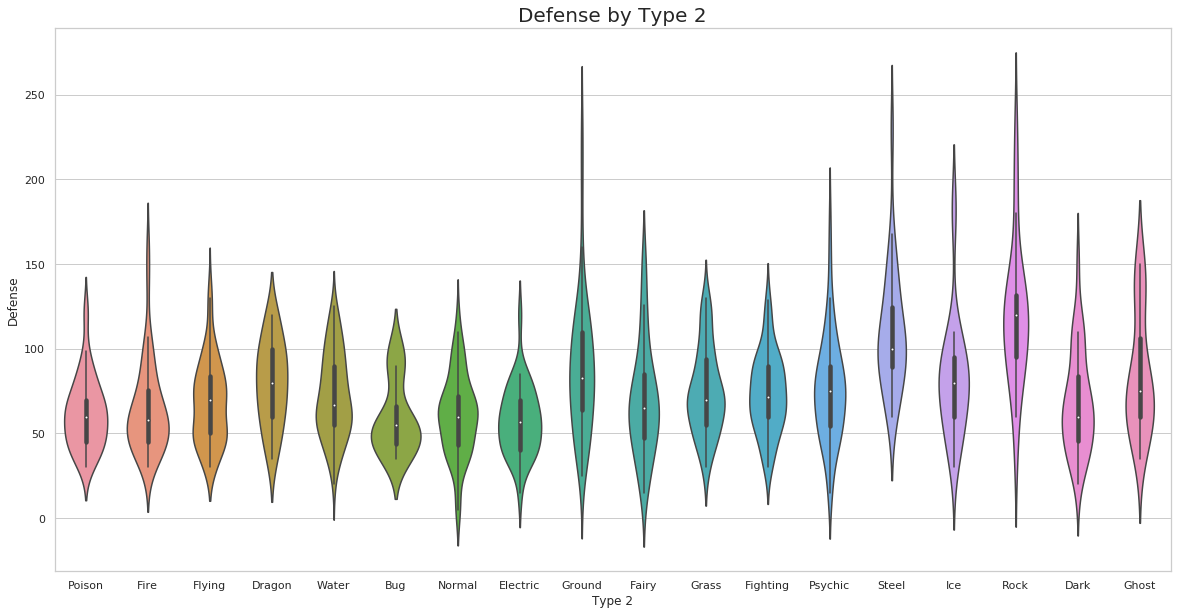

In [21]:
#stats for the Defense by Type 2
f, ax = plt.subplots(1,1, figsize = (20,10))

ax = sns.violinplot(data = data2, x = 'Type 2', y = 'Defense')
ax.set_title(label='Defense by Type 2', size = 20)

plt.show()

And this shows that **Rock** pokemon is better than** Steel** pokemon in Defense values.

<a id = "11"></a>
### Strongest Generation

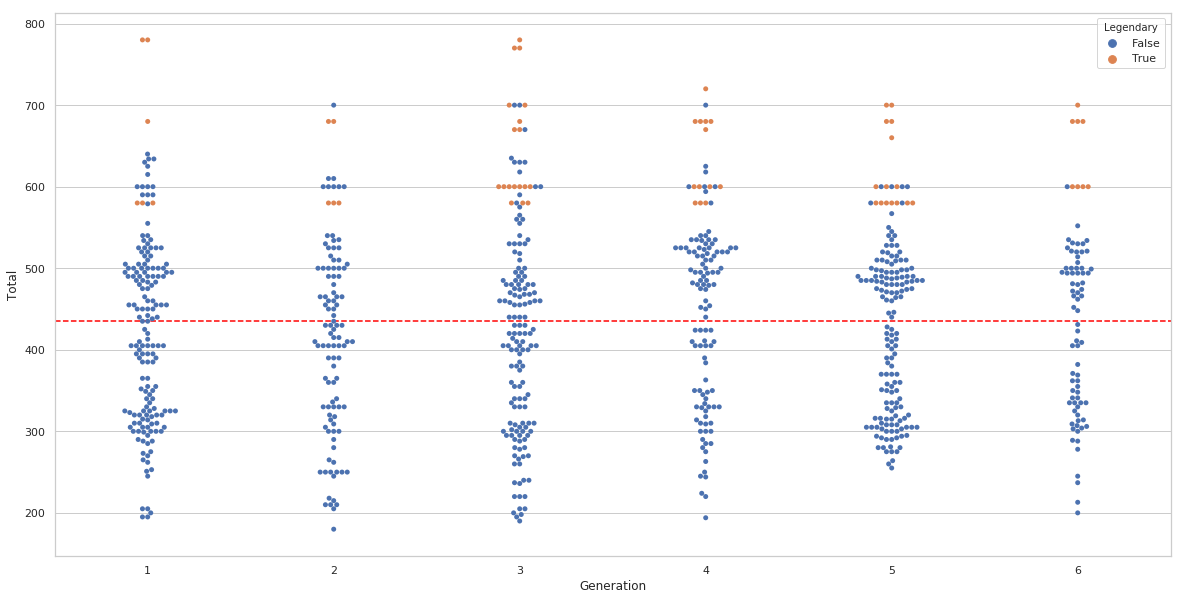

In [22]:
f, ax = plt.subplots(0,0, figsize = (20,10))
ax = sns.swarmplot(data = data, x = 'Generation', y= 'Total', hue = 'Legendary')

plt.axhline(data['Total'].mean(), color = 'red', linestyle = 'dashed') #giving a straight line on mean

plt.show()

This shows that 3rd generation has many strong pokemons. And also this data informed that all Legendary pokemon are strong or even the strongest.

<a id = "12"></a>
### Finding any correlation

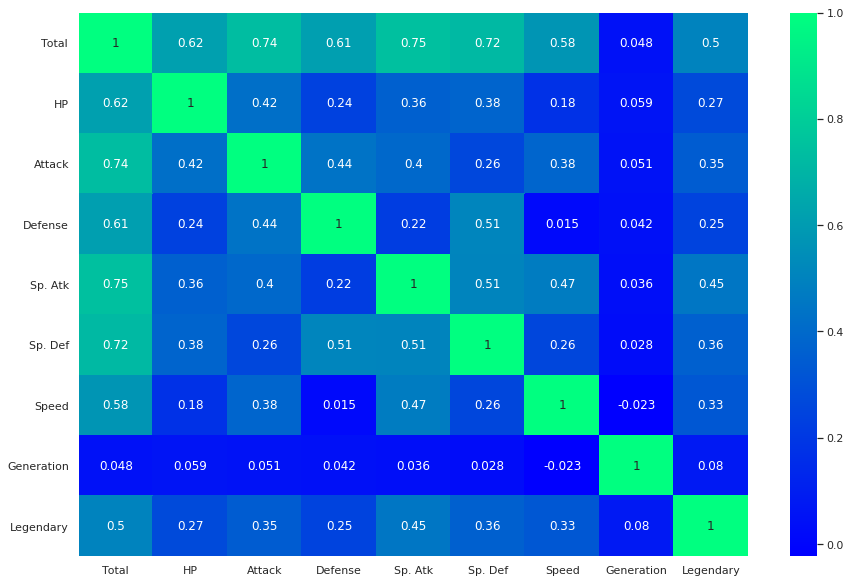

In [23]:
f, ax = plt.subplots(0,0,figsize=(15,10))
ax = sns.heatmap(data.corr(), annot = True, cmap = 'winter') #data.corr() used to make correlation matrix

plt.show()

From the heat map above, the correlation between the attributes of the pokemon is not to much. The highest correlation is *Sp. Attack* and *Total*, following *Attack *with *Total *and *Sp. Defense* and *Total*.

______________________________________

Ok, that's all my analysis. If you think I missed something, feel free to comment. Thank you for reading this notebook!